In [0]:
!pip install -q janome

In [0]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Embedding, GlobalMaxPool1D, Input, LSTM
from keras.models import Model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer as tk
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from janome.tokenizer import Tokenizer

In [0]:
np.random.seed(93187)

In [0]:
!wget -q 'https://gitlab.com/pastalian/cheating-algorithmer/raw/master/data_jp/data_jp.csv'

In [0]:
LABELS = ['dp', 'geo', 'graph']

In [0]:
df = pd.read_csv('data_jp.csv')
x, y = df['text'].values, df['tag'].values

In [0]:
y_tmp = []
for a in y:
  tmp = [0] * len(LABELS)
  for i, l in enumerate(LABELS):
    tmp[i] = 1 if l == a else 0
  y_tmp += [tmp]
y = np.asarray(y_tmp)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                     random_state=93187)

In [0]:
tokenizer = Tokenizer(wakati=True)
x2_train = [[s for s in tokenizer.tokenize(j)] for j in x_train]
x2_test = [[s for s in tokenizer.tokenize(j)] for j in x_test]

In [0]:
max_features = 10000
tkn = tk(num_words=max_features)
tkn.fit_on_texts(x_train)
#tkn.fit_on_texts(x2_train)
x3_train = tkn.texts_to_sequences(x2_train)
x3_test = tkn.texts_to_sequences(x2_test)

In [0]:
MAX_LEN = 512
x4_train = sequence.pad_sequences(x3_train, maxlen=MAX_LEN)
x4_test = sequence.pad_sequences(x3_test, maxlen=MAX_LEN)

In [0]:
embed_size = 32
dim = int(embed_size / 2);

inp = Input(shape=(MAX_LEN, ))
x = Embedding(max_features, embed_size, mask_zero=False)(inp)
x = LSTM(dim, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(x)
x = Dropout(0.5)(x)
#x = Dense(8, kernel_regularizer=keras.regularizers.l2(0.001),
#                   activation='relu')(x)
x = Dense(len(LABELS), activation="softmax")(x)

In [0]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 512, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 323,187
Trainable params: 323,187
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size = 64
epochs = 512
history = model.fit(x4_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_split=0.1)

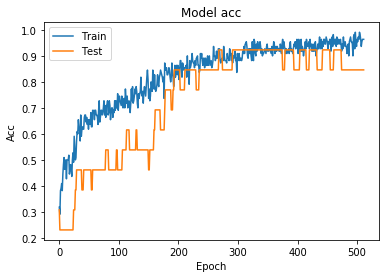

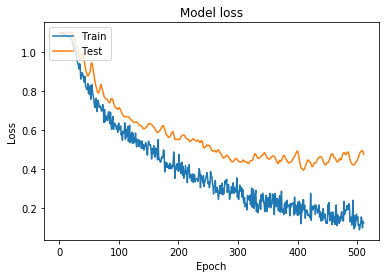

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
scores = model.evaluate(x4_test, y_test)
print('loss:', scores[0])
print('acc:', scores[1])

31/31 [==============================] - 0s 2ms/step
loss: 0.5701199769973755
acc: 0.8387096524238586
